<a href="https://colab.research.google.com/github/dragos000/Pytorch-Tutorial/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [132]:
# Create a model class which inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 feauture of the Iris Flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # Output (3 clases of Iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [133]:
# Pick a manual seed
torch.manual_seed(41)
# Create an instance of the model
model = Model()

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [136]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [137]:
# Change the neames in the last column with numbers
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df.tail()

/tmp/ipython-input-4228703630.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [138]:
# Train test split! Set x, y
x = my_df.drop('species',axis=1)
y = my_df['species']

In [139]:
# Convery x,y to numpy arrays
x = x.values
y = y.values

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41) # test size is 20%

# Convert x features to torch float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)



In [142]:
# Set the criterion of the model to measure the error, how far off the predicitions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, set learning rate lr (if the error doesn't go down after a bunch of itterations (epochs), then lower the learning rate )
optimizer = torch.optim.Adam(model.parameters(),lr=0.008)

In [143]:
# Train the model
# Epoch? (one run thru all the training data in our network)
epoch = 100
losses = []

for i in range(epoch):
  # Go forward and get a prediction
  y_pred = model.forward(x_train) # Get predicted results

  # Measure the loss, error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i%10 ==0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back to the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0323857069015503
Epoch: 20 and loss: 0.9013576507568359
Epoch: 30 and loss: 0.6928884387016296
Epoch: 40 and loss: 0.5176448225975037
Epoch: 50 and loss: 0.37191274762153625
Epoch: 60 and loss: 0.2643650770187378
Epoch: 70 and loss: 0.18928170204162598
Epoch: 80 and loss: 0.13699088990688324
Epoch: 90 and loss: 0.10192132741212845


Text(0, 0.5, 'losses/error')

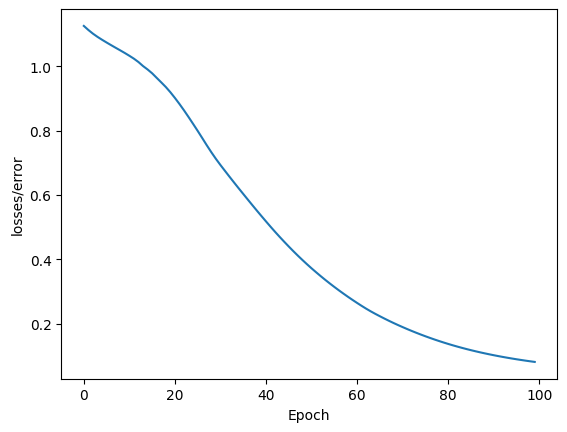

In [144]:
# Graph it out
plt.plot(range(epoch),losses)
plt.xlabel("Epoch")
plt.ylabel("losses/error")
